In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

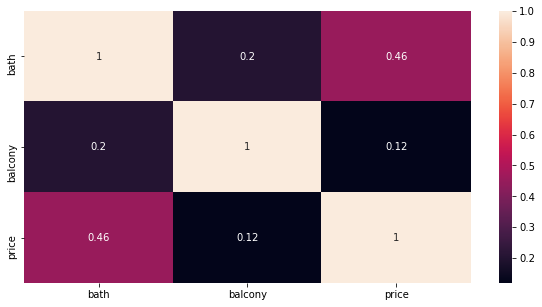

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

#### Removing below columns as they are not much necessary in describing price of a flat/house.

In [5]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns').copy()
df1.shape

(13320, 5)

In [6]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

As na values are less. So lets drop it.

In [8]:
df1.dropna(inplace=True)
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# removing bhk from the size column values
df1.loc[:,'size'] = df1['size'].str.strip().apply(lambda x: int(x.split(' ')[0]))

In [11]:
df1['size'].dtype

dtype('int64')

In [12]:
df1.rename(columns={'size':'bhk'}, inplace=True)
df1.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [13]:
df1.shape

(13246, 5)

In [14]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# We see there are diff types of values inserted in total_sqft col

In [16]:
#checking what type of values exist in total_sqft coln
df1[df1.total_sqft.apply(lambda x: False if ('-' in x or len(x)<6) else True)] 

,location,bhk,total_sqft,bath,price
44,Kanakpura Road,2,1330.74,2.0,91.79
142,Kasavanhalli,3,1563.05,3.0,105.00
373,Gopalapura,3,2023.71,3.0,275.00
393,Electronics City Phase 1,2,1113.27,2.0,53.00
410,Kengeri,1,34.46Sq. Meter,1.0,18.50
...,...,...,...,...,...
12652,Billamaranahalli,2,300Sq. Yards,2.0,150.00
12757,Langford Gardens,3,2777.29,5.0,649.00
12843,Jakkur,3,1932.47,3.0,183.00
13086,Sindhi Colony,5,5665.84,7.0,988.00


In [17]:
# We have to clean these type of values: "34.46Sq. Meter" (above)

In [18]:
#function to clean total_sqft
def clean_total_sqft(x):
    try:
        return float(x)
    except:
        try:
            l = [float(i) for i in x.split('-')]
            if len(l) >= 2:
                return np.average(l)  # taking avg of values given as "23-35"
        except:
            return np.NaN

df1.total_sqft = df1.total_sqft.str.strip().apply(clean_total_sqft)

In [19]:
df1.isnull().sum()

location       0
bhk            0
total_sqft    46
bath           0
price          0
dtype: int64

In [20]:
# Dropping NaN rows as they are very less in number
df1.dropna(inplace=True)
df1.shape

(13200, 5)

In [21]:
# Making new feature and representing prices in lakhs

In [22]:
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']
df1.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [23]:
# Chcking diff values in location col

In [24]:
s = df1.location.str.strip().value_counts()
s

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Muthyala Nagar                 1
Kanakapura main  Road          1
elachenahalli                  1
banashankari stage iii sa      1
Prakruthi Township             1
Name: location, Length: 1287, dtype: int64

In [25]:
# locns with frequency in the table <= 10 -> These can be categorised as "others" 
# (there are 1047 such locns, see below)
len(s[s<=10])

1047

In [26]:
# locns with frequency in the table > 10; saved in series s
s = s[s>10]
len(s)

240

In [27]:
df1.location = df1.location.str.strip().apply(lambda x: x if x in s else 'other')
len(df1.location.value_counts())

241

In [28]:
df1.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [29]:
#Assuming 1bhk size SHOULD >=300sqft.... So eleminating rows that says 1bhk<300 sqft.
df1 = df1[(df1.total_sqft/df1.bhk)>=300]

In [30]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
# Above says, max value of per sqft is 176470, which is usually not possible in bangalor

In [32]:
df1.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [33]:
# So Removing price outliers
df2 = pd.DataFrame()

for loc, df_loc in df1.groupby('location'):
    _mean = np.mean(df_loc.price_per_sqft)   # mean price of particular location
    _std = np.std(df_loc.price_per_sqft)
    
#     Taking those rows where price is in 1 std_dev of mean price at a particular locn
    df_ = df_loc[(df_loc.price_per_sqft > (_mean-_std)) & (df_loc.price_per_sqft <= (_mean+_std))]
    
#     Making new dataframe out of this
    df2 = pd.concat([df2, df_], axis='rows', ignore_index=True)

# df2.shape()

In [34]:
df2.shape

(10242, 6)

In [35]:
df2.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


In [36]:
df2.location.value_counts()

other                   2306
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Banjara Layout             4
Vishveshwarya Layout       4
HAL 2nd Stage              4
Vishwapriya Layout         4
Marsur                     3
Name: location, Length: 241, dtype: int64

Text(0, 0.5, 'price')

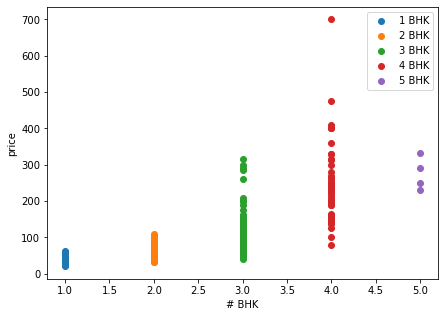

In [37]:
plt.figure(figsize=(7,5))

_locn='Whitefield'
for _bhk, bhk_df in df2[df2.location==_locn].groupby('bhk'):
    plt.plot(bhk_df.bhk, bhk_df.price, 'o', label=str(_bhk)+' BHK', )
plt.legend()
plt.xlabel('# BHK')
plt.ylabel('price')

In [38]:
# So from above we can see prices of 3/4 bhk are higher than 4/5 bhk
# removing outliers where price of 2bhk > 3 bhk and so on, **location wise

In [39]:
# def remove_bhk_outliers(df):
exclude_indices = np.array([])

for locn, locn_df in df2.groupby('location'):
    bhk_stats = {}
    
    for _bhk, bhk_df in locn_df.groupby('bhk'):
        bhk_stats[_bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
        }
        
    for bhk, bhk_df in locn_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
#             price of bhk < mean price of bhk-1
#             np.append, appends 2 arrays
            exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
df2.drop(exclude_indices,axis='index', inplace=True)

df2.shape

(7317, 6)

In [40]:
df2.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


In [41]:
# Checking Bathroom outliers, considering #bathrooms<= bhk+2

In [42]:
df2[df2.bath>10]

,location,bhk,total_sqft,bath,price,price_per_sqft
5277,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8483,other,10,12000.0,12.0,525.0,4375.000000
8572,other,16,10000.0,16.0,550.0,5500.000000
9306,other,11,6000.0,12.0,150.0,2500.000000
9637,other,13,5425.0,13.0,275.0,5069.124424


In [43]:
df2 = df2[df2.bath<(df2.bhk+2)]
df2.shape

(7239, 6)

In [44]:
# Now cleaning is completed. Dropping price_per_sqft as not needed and is added manually
df2.drop(['price_per_sqft'], axis=1, inplace=True)

In [45]:
df2.head()

,location,bhk,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


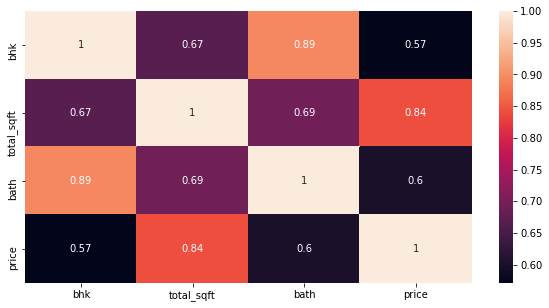

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True)

# Model Building

In [47]:
dum = pd.get_dummies(df2.location)

df3 = pd.concat([df2.drop('location',axis='columns'), dum.drop('other',axis='columns')],axis=1)
df3.head()

,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df3.shape

(7239, 244)

In [49]:
X = df3.drop(['price'],axis='columns')
y = df3.price

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8629132245229805

In [51]:
#Using K fold

In [52]:
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit

_cv = ShuffleSplit(test_size=0.2, random_state=0)
n_arr = cross_val_score(LinearRegression(), X, y, cv=_cv)
print(n_arr)
np.average(n_arr)

[0.82702546 0.86027005 0.85322178 0.8436466  0.85481502 0.7996843
 0.8546295  0.84180048 0.79241964 0.85944248]


0.8386955300763829

In [53]:
#Finding Best Model using Grid Search CV

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [55]:
models = \
{
    'linear_regression' : 
            {
            'model': LinearRegression(),
            'params':{'normalize': [True, False]}
            },
    
    'lasso':
            {
            'model': Lasso(),
            'params': {'alpha': [1,2], 'selection': ['random', 'cyclic']}
            },
    
    'decision_tree':
            {
            'model': DecisionTreeRegressor(),
            'params': {'criterion' : ['mse','friedman_mse'], 'splitter': ['best','random']}
            }
}

In [56]:
scores = []
_cv = ShuffleSplit(test_size=0.2, random_state=0)

for model, model_val in models.items():
    gscv = GridSearchCV(model_val['model'], model_val['params'], cv=_cv, return_train_score=False)
    gscv.fit(X,y)
    scores.append({
        'model': model,
        'best_score': gscv.best_score_,
        'best_params': gscv.best_params_
    })
pd.DataFrame(scores)

,model,best_score,best_params
0,linear_regression,0.838696,{'normalize': True}
1,lasso,0.713449,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.701578,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [57]:
# So linear reg is Best

In [58]:
# Testing the model randomly

In [59]:
X.columns

Index(['bhk', 'total_sqft', 'bath', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [60]:
cols = list(X.columns)

def predict_price(bhk, size, n_bath, locn):
    arr = np.zeros((1,len(cols)))
    arr[0][0] = bhk
    arr[0][1] = size
    arr[0][2] = n_bath
    
    try:
#         Finding index of locn
        pos = cols.index(locn)
#         Putting '1' at that index posn
        arr[0][pos] = 1
    except:
        pass
    return lr.predict(arr)

In [61]:
predict_price(2, 2010, 2, 'Koi OTHER waali jgh')

array([162.33440812])

In [62]:
predict_price(2, 1000, 2, '1st Phase JP Nagar')

array([83.86570258])

In [63]:
predict_price(3, 1000, 3, '1st Phase JP Nagar')

array([86.08062285])

In [64]:
#Exporting the model in pickle form

In [65]:
import pickle
with open('bengaluru_model.pickle', 'wb') as fobj:
    pickle.dump(lr, fobj)

In [66]:
import json
cols = [i.lower() for i in X.columns]
with open('bengaluru_cols.json', 'w') as fobj:
    json.dump(cols, fobj)